In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Any Voxel Based Image or Model

In [27]:
coords = np.loadtxt('voxelizer.txt', unpack=True, delimiter=',', dtype=float)
coords[[1,2]] = coords[[2,1]]
coords = coords[:3,:]
coords *= 2.9759/660 *2.1/1.9 #scale
colors = list(zip(*coords/max(coords.ravel()).tolist()))

center = np.mean(coords, axis=1)
coords = (coords.T - center).T

x, y, z = coords
center # Pre-adjustment

array([1.32362225, 2.1638209 , 0.73064612])

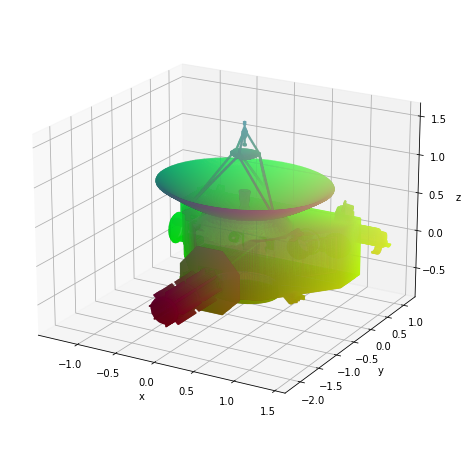

In [29]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, s=0.01, color=colors)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=20)
plt.show()

In [30]:
print(max(x)-min(x))
print(max(y)-min(y))
print(max(z)-min(z))

2.745944090909091
3.289152631578948
2.237620502392345


In [33]:
# This is an input. We assume mass in evenly distributed so each voxel has the same mass. We need the total dry mass
mTotal = 400                    #kg
N = coords.shape[1]             # Number of voxels

mi = mTotal/N

Ix = sum(mi*(y**2+z**2))
Iy = sum(mi*(x**2+z**2))
Iz = sum(mi*(x**2+y**2))
Ixy = sum(-mi*(np.multiply(x,y)))
Ixz = sum(-mi*(np.multiply(x,z)))
Iyz = sum(-mi*(np.multiply(y,z)))

I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)

,0,1,2
0,338.792321,1.678977,-3.259710
1,1.678977,229.689618,-3.418965
2,-3.259710,-3.418965,396.670575
